In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [347]:
df = pd.read_csv('Gradient_Descent_Data.csv')

In [348]:
df_normalised = (df - df.min())/(df.max()-df.min()) # normalizing the dataset
df_normalised['int'] = 1 # adding an intercept term

1.1251922074262914e-06


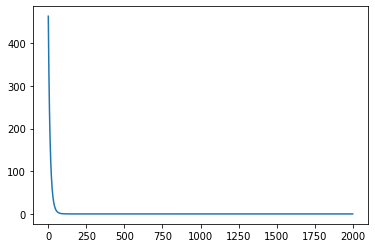

In [376]:
Y = df_normalised['Y'].to_numpy()              # Converting into a scaled target variable
Y = Y.reshape(-1,1)                            # Reshaping since numpy ignores single dimension
X = df_normalised.iloc[:,1:].to_numpy()        # Converting into a scaled feature variables
Coeff = np.random.standard_normal(X.shape[1])  # Initiation weights
Coeff = Coeff.reshape(-1, 1)                   # Reshaping since numpy ignores single dimension
i = 0                                          # Epoch Start
Loss = []                                      # Placeholder for Loss
while i < 2000:
    S_1 = Y - np.matmul(X,Coeff)               #Y - XB
    Loss.append(np.matmul(S_1.transpose(),S_1).item()) #LOSS = (Y - XB)T x (Y - XB)
    update_coeff = np.matmul(S_1.transpose(),-X) # COEFF_UPDATE = (Y - XB)T x -X
    Coeff-= 0.00131*update_coeff.transpose()     # UPDATED_COEFF = CURRENT_COEFF - LEARNING_RATE*COEFF_UPDATE
    i+=1
plt.plot(Loss)
print(Loss[-1])

In [377]:
coeff_list = []                                                  # Placeholder for the loss calculated
rescale = (df.max()-df.min()).to_list()[1:]                      # The Max - Min for every feature
rescale = [(df.max()-df.min()).to_list()[0]/x for x in rescale]  # UNSCALING_FACTOR = The Max - Min of Target/The Max - Min for every feature
rescale.append(1)                                                # Since intercept variable is 1 and was not scaled
for i,c in enumerate(Coeff):
    coeff_list.append(c[0]*rescale[i])                           # For all the coeffecients the respective scaling factors are applied                                                 

In [382]:
# CHECKING FOR RMSE

X = df.iloc[:,1:]                                    # FEATURE MATRIX
X['int'] = 1                                         # ADDING INTERCEPT
X = X.to_numpy()                                     # CONVERTING TO MATRIX
coeff_array = np.asarray(coeff_list)                 # CONVERTING COEFFS INTO MATRIX
e = df['Y'].to_numpy() - np.matmul(X, coeff_array)   # Error = Y - Ypred i.e. Y - XB
print(f"RMSE: {np.sqrt(np.matmul(e.transpose(),e))}")                  # RMSE = sqrt(e_transpose x e)

RMSE: 10.118310027375214
